In [1]:
# QUESTION 1
import sqlite3

# 데이터베이스 경로 설정
db_path = "/blue/bsc4452/seoyeon0814/problem_set5/world.sqlite"  

# SQLite 데이터베이스 연결
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# SQL 쿼리 작성: 독립 연도가 가장 최근인 국가 찾기
sql_query = """
SELECT Name, IndepYear
FROM country
WHERE IndepYear IS NOT NULL
ORDER BY IndepYear DESC
LIMIT 1;
"""

# SQL 실행
cursor.execute(sql_query)
result = cursor.fetchone()

# 결과 출력
if result:
    print(f"The country with the most recent independence is {result[0]}, in {result[1]}.")
else:
    print("No country found with independence year.")

# 연결 닫기
connection.close()

The country with the most recent independence is South Sudan, in 2011.


In [58]:
# QUESTION 2
import sqlite3

# 데이터베이스 연결
db_path = "/blue/bsc4452/seoyeon0814/problem_set5/world.sqlite"
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# South Sudan이 이미 존재하는지 확인
cursor.execute("SELECT * FROM country WHERE Code = 'SSD';")
if cursor.fetchone():
    print("Country with Code 'SSD' already exists.")
else:
    # SQL 실행
    sql_insert = """
    INSERT INTO country (Code, Name, Continent, Region, SurfaceArea, Population, LifeExpectancy, IndepYear)
    VALUES ('SSD', 'South Sudan', 'Africa', 'Eastern Africa', 619745, 11062113, 57.3, 2011);
    """
    cursor.execute(sql_insert)

    # 변경 사항 저장
    connection.commit()

    # 확인 메시지
    print("South Sudan has been added to the country table.")

# 연결 닫기
connection.close()


South Sudan has been added to the country table.


In [2]:
# 남수단 정보가 제대로 들어가서, 해당정보가 어떤 내용들이 존재하는지 확인하고자 할 때
import sqlite3

# 데이터베이스 경로 설정
db_path = "/blue/bsc4452/seoyeon0814/problem_set5/world.sqlite"

try:
    # 데이터베이스 연결
    connection = sqlite3.connect(db_path)
    cursor = connection.cursor()

    # SQL 쿼리 작성: South Sudan 정보 조회
    sql_query = """
    SELECT *
    FROM country
    WHERE Name = 'South Sudan';
    """

    # SQL 실행
    cursor.execute(sql_query)
    result = cursor.fetchone()

    # 결과 출력
    if result:
        print("South Sudan information:")
        print(result)
    else:
        print("South Sudan is not found in the country table.")

except sqlite3.OperationalError as e:
    print(f"Database error: {e}")

finally:
    # 연결 닫기
    if connection:
        connection.close()

South Sudan information:
('SSD', 'South Sudan', 'Africa', 'Eastern Africa', 619745.0, 2011, 11062113, 57.3, None, None, '', '', None, None, '')


In [60]:
# QUESTION 3
import sqlite3

# 데이터베이스 경로 설정
db_path = "/blue/bsc4452/seoyeon0814/problem_set5/world.sqlite"  # 경로 수정
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# South Sudan의 두 도시 데이터 추가
try:
    # 기존 데이터 확인
    cursor.execute("SELECT * FROM city WHERE CountryCode = 'SSD';")
    existing_cities = cursor.fetchall()

    if len(existing_cities) > 0:
        print("South Sudan cities already exist in the table:")
        for city in existing_cities:
            print(city)
    else:
        # SQL INSERT 실행
        sql_insert = """
        INSERT INTO city (Name, CountryCode, Population)
        VALUES 
            ('Juba', 'SSD', 525953),
            ('Malakal', 'SSD', 147450);
        """
        cursor.execute(sql_insert)

        # 변경 사항 저장
        connection.commit()
        print("Cities Juba and Malakal have been added to the city table.")

except sqlite3.Error as e:
    print(f"Database error: {e}")

finally:
    # 연결 닫기
    if connection:
        connection.close()


Cities Juba and Malakal have been added to the city table.


In [63]:
#테이블에 추가되었는지 확인
import sqlite3

# 데이터베이스 경로 설정
db_path = "/blue/bsc4452/seoyeon0814/problem_set5/world.sqlite"  # 경로 수정

try:
    # 데이터베이스 연결
    connection = sqlite3.connect(db_path)
    cursor = connection.cursor()

    # South Sudan 관련 국가 정보 추출
    print("Fetching South Sudan information from the country table:")
    sql_query_country = """
    SELECT * 
    FROM country
    WHERE Name = 'South Sudan';
    """
    cursor.execute(sql_query_country)
    country_info = cursor.fetchone()

    if country_info:
        print("Country Information:")
        print(country_info)
    else:
        print("No information found for South Sudan in the country table.")

    # South Sudan 관련 도시 정보 추출
    print("\nFetching South Sudan cities from the city table:")
    sql_query_cities = """
    SELECT * 
    FROM city
    WHERE CountryCode = 'SSD';
    """
    cursor.execute(sql_query_cities)
    city_info = cursor.fetchall()

    if city_info:
        print("City Information:")
        for city in city_info:
            print(city)
    else:
        print("No city information found for South Sudan in the city table.")

except sqlite3.Error as e:
    print(f"Database error: {e}")

finally:
    # 연결 닫기
    if connection:
        connection.close()


Fetching South Sudan information from the country table:
Country Information:
('SSD', 'South Sudan', 'Africa', 'Eastern Africa', 619745.0, 2011, 11062113, 57.3, None, None, '', '', None, None, '')

Fetching South Sudan cities from the city table:
City Information:
(1234568, 'Juba', 'SSD', '', 525953)
(1234569, 'Malakal', 'SSD', '', 147450)


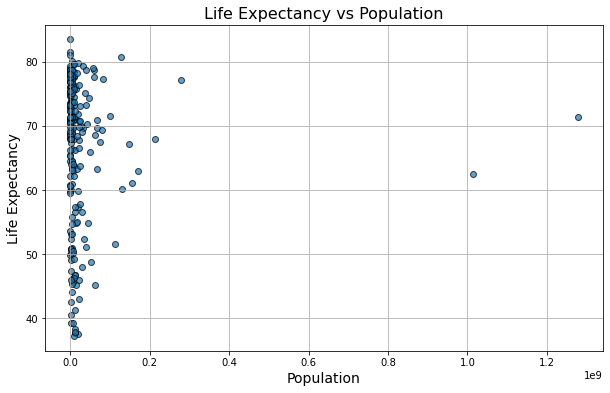

In [64]:
# QUESTION 4
from sqlalchemy import create_engine, MetaData, Table, select
import pandas as pd
import matplotlib.pyplot as plt

# 데이터베이스 연결 설정
db_path = "/blue/bsc4452/seoyeon0814/problem_set5/world.sqlite"  # 경로 수정
engine = create_engine(f'sqlite:///{db_path}')
connection = engine.connect()
metadata = MetaData()

# 테이블 로드
country = Table('country', metadata, autoload_with=engine)

# SQLAlchemy 쿼리 작성: LifeExpectancy와 Population 추출
query = select([country.c.LifeExpectancy, country.c.Population]).where(country.c.LifeExpectancy != None)

# 데이터 가져오기
result = connection.execute(query).fetchall()

# Pandas DataFrame 생성
df = pd.DataFrame(result, columns=["LifeExpectancy", "Population"])

# 연결 닫기
connection.close()

# 데이터 필터링: Population과 LifeExpectancy가 유효한 값만 사용
df = df.dropna()

# Matplotlib로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['Population'], df['LifeExpectancy'], alpha=0.7, edgecolor='k')
plt.title("Life Expectancy vs Population", fontsize=16)
plt.xlabel("Population", fontsize=14)
plt.ylabel("Life Expectancy", fontsize=14)
plt.grid(True)
plt.show()


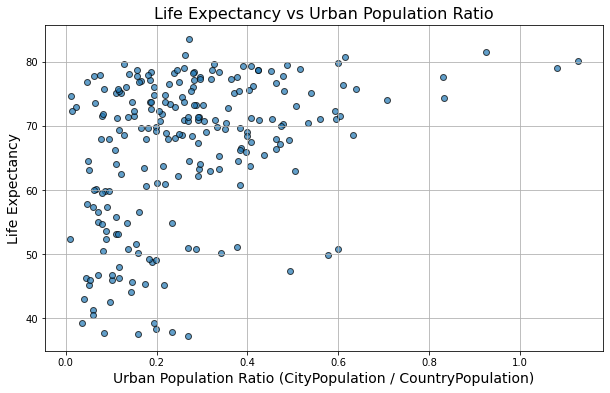

In [66]:
# Grad student extra credit
from sqlalchemy import create_engine, MetaData, Table, select, func, and_
import pandas as pd
import matplotlib.pyplot as plt

# 데이터베이스 연결 설정
db_path = "/blue/bsc4452/seoyeon0814/problem_set5/world.sqlite"  # 경로 수정
engine = create_engine(f'sqlite:///{db_path}')
connection = engine.connect()
metadata = MetaData()

# 테이블 로드
country = Table('country', metadata, autoload_with=engine)
city = Table('city', metadata, autoload_with=engine)

# SQLAlchemy 쿼리 작성: 도시 인구 합계와 국가 데이터 추출
query = (
    select([
        country.c.Name,
        country.c.LifeExpectancy,
        country.c.Population,
        func.sum(city.c.Population).label('CityPopulation')
    ])
    .select_from(country.join(city, country.c.Code == city.c.CountryCode))
    .group_by(country.c.Code)
    .having(and_(country.c.Population != None, country.c.LifeExpectancy != None))
)

# 데이터 가져오기
result = connection.execute(query).fetchall()

# Pandas DataFrame 생성
df = pd.DataFrame(result, columns=["CountryName", "LifeExpectancy", "CountryPopulation", "CityPopulation"])

# 도시 인구 비율 계산 (CityPopulation / CountryPopulation)
df['UrbanRatio'] = df['CityPopulation'] / df['CountryPopulation']

# 연결 닫기
connection.close()

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['UrbanRatio'], df['LifeExpectancy'], alpha=0.7, edgecolor='k')
plt.title("Life Expectancy vs Urban Population Ratio", fontsize=16)
plt.xlabel("Urban Population Ratio (CityPopulation / CountryPopulation)", fontsize=14)
plt.ylabel("Life Expectancy", fontsize=14)
plt.grid(True)
plt.show()
